In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse a single line from the file
def parse_line(line):
    parts = line.strip().split()
    outcome = int(parts[0])  
    features = {int(f.split(':')[0]): float(f.split(':')[1]) for f in parts[1:]}  
    return outcome, features

# Reading and parsing the unsegmented data file
file_path = 'diabetesun.csv'  
with open(file_path, 'r') as file:
    lines = file.readlines()

# Apply the parsing function to each line
parsed_data = [parse_line(line) for line in lines]

# Separate outcomes and features
outcomes, features = zip(*parsed_data)

# Convert the features into a DataFrame and the outcomes into a Series
df_features = pd.DataFrame(features)  
df_outcomes = pd.Series(outcomes, name='Outcome')

# Concatenate outcomes with features to form a complete dataset
df = pd.concat([df_outcomes, df_features], axis=1)

# Show summary statistics
print(df.describe())

# Verify if there are any NaN values left
print(df.isna().sum())

print(df.info())

          Outcome           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.302083    3.845052  120.894531   69.105469   20.536458   79.799479   
std      0.953903    3.369578   31.972618   19.355807   15.952218  115.244002   
min     -1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     -1.000000    1.000000   99.000000   62.000000    0.000000    0.000000   
50%      1.000000    3.000000  117.000000   72.000000   23.000000   30.500000   
75%      1.000000    6.000000  140.250000   80.000000   32.000000  127.250000   
max      1.000000   17.000000  199.000000  122.000000   99.000000  846.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885  
std      7.884160    0.331329   11.760232  
min      0.000000    0.078000   21.000000  
25%     27.299999    0.243750   24.000000  
50%   

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outcome,768.0,0.302083,0.953903,-1.000,-1.000000,1.0000,1.000000,1.000000
1,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.000000,17.000000
2,768.0,120.894531,31.972618,0.000,99.000000,117.0000,140.250000,199.000000
3,768.0,69.105469,19.355807,0.000,62.000000,72.0000,80.000000,122.000000
4,768.0,20.536458,15.952218,0.000,0.000000,23.0000,32.000000,99.000000
5,768.0,79.799479,115.244002,0.000,0.000000,30.5000,127.250000,846.000000
6,768.0,31.992578,7.884160,0.000,27.299999,32.0000,36.599998,67.099998
7,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.626250,2.420000
8,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.000000,81.000000


array([[<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

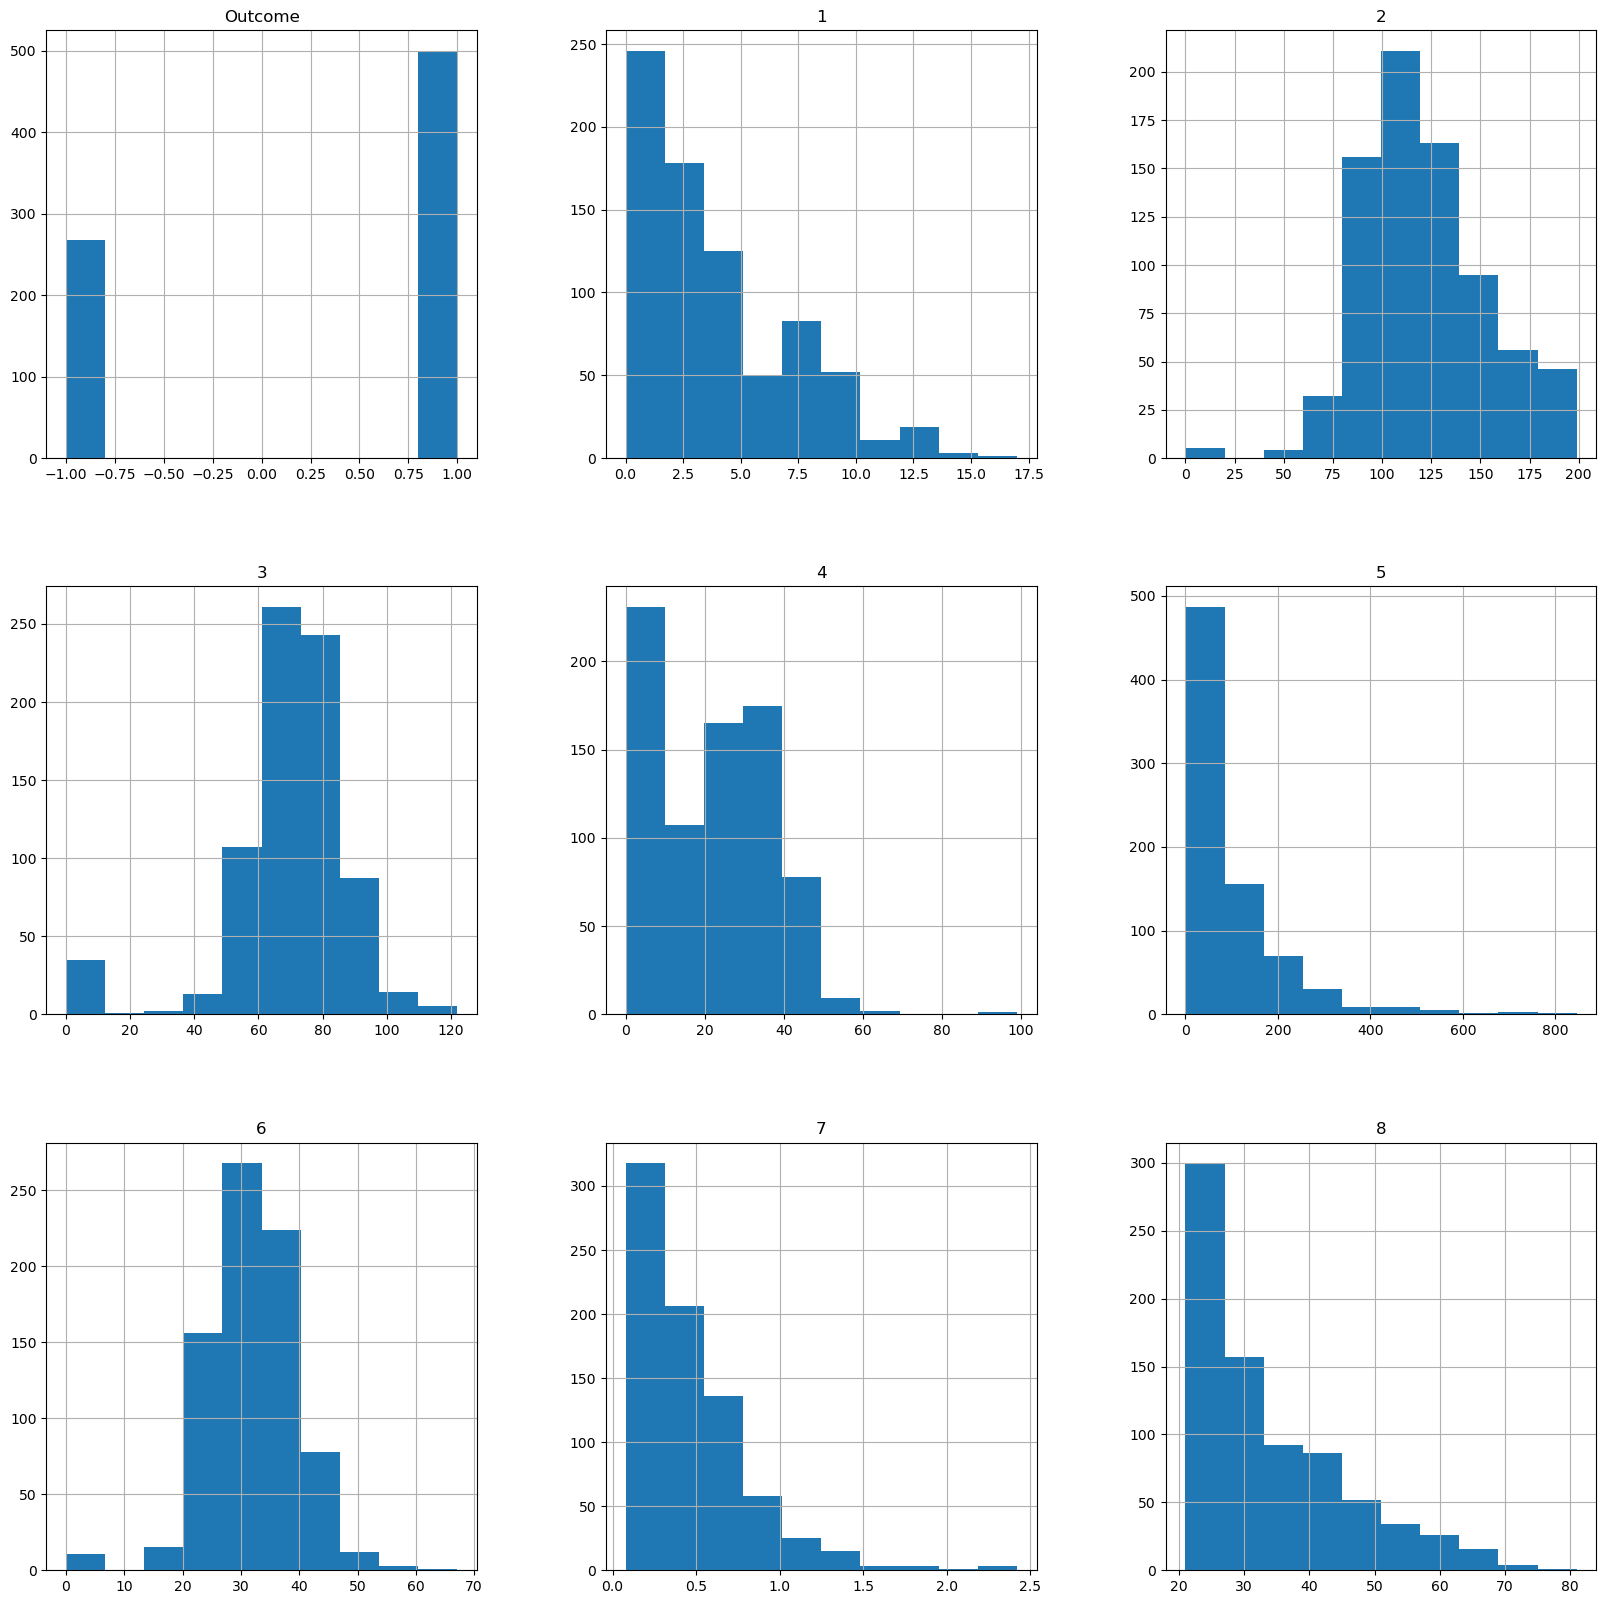

In [3]:
df.hist(figsize=(20,20))

Counts of Outcome (1 and -1):
Outcome
 1    500
-1    268
Name: count, dtype: int64


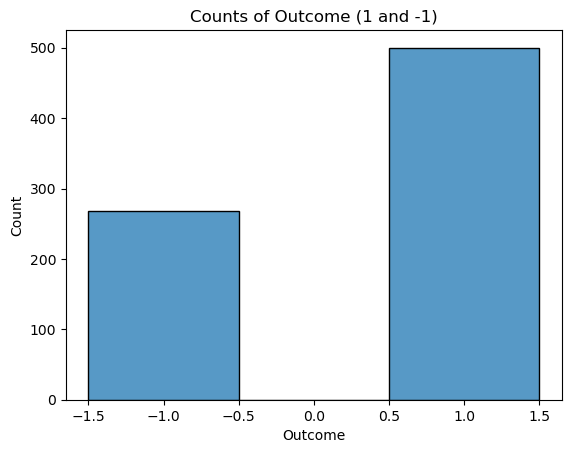

In [4]:
outcome_counts = df['Outcome'].value_counts()

# Print the counts of each outcome value
print("Counts of Outcome (1 and -1):")
print(outcome_counts)

# Plot the histogram for Outcome counts (-1 and 1)
sns.histplot(df['Outcome'], bins=2, discrete=True)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome (1 and -1)')
plt.show()

          Outcome           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.302083   -0.547641    0.215020    0.132877   -0.585122   -0.811349   
std      0.953903    0.396421    0.321333    0.317308    0.322267    0.272444   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -0.882353   -0.005025    0.016393   -1.000000   -1.000000   
50%      1.000000   -0.647059    0.175879    0.180328   -0.535354   -0.927896   
75%      1.000000   -0.294118    0.409548    0.311475   -0.353535   -0.699173   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean    -0.046421   -0.663641   -0.591970  
std      0.234997    0.282945    0.392008  
min     -1.000000   -1.000000   -1.000000  
25%     -0.186289   -0.858454   -0.900000  
50%   

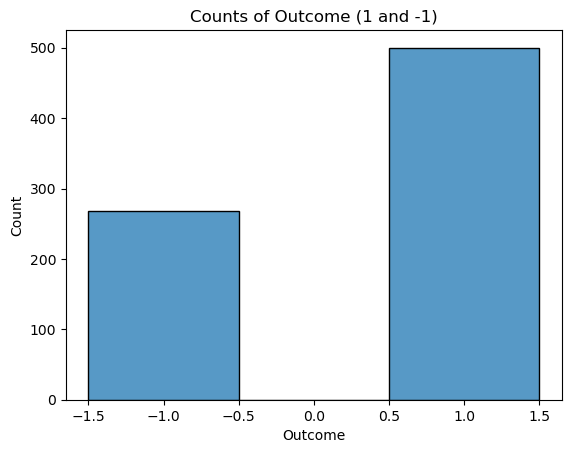

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Concatenate scaled features with outcomes
df_scaled = pd.concat([df_outcomes, X_scaled], axis=1)

# Show summary statistics of the scaled dataset
print(df_scaled.describe())

# Verify if there are any NaN values left
print(f"'NA quantity:' {df_scaled.isna().sum()}")

# Print dataset info
print(df_scaled.info())

# Optionally, you can plot the histogram for Outcome counts
sns.histplot(df_scaled['Outcome'], bins=2, discrete=True)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome (1 and -1)')
plt.show()

In [6]:

outcome_counts = df_scaled['Outcome'].value_counts()

# Print the counts of each outcome value
print("Counts of Outcome (1 and -1):")
print(outcome_counts)

Counts of Outcome (1 and -1):
Outcome
 1    500
-1    268
Name: count, dtype: int64


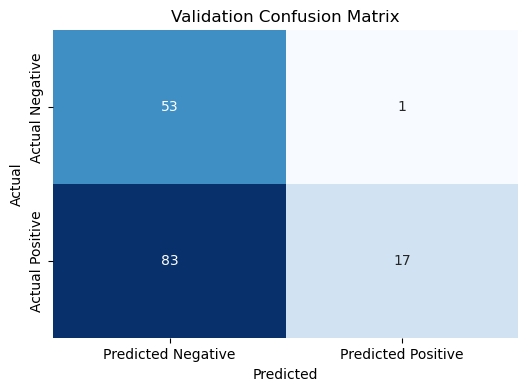

Baseline Model Results
Val Accuracy: 0.45454545454545453
Precision: 0.9444
Recall: 0.1700
False Negative Rate (FNR): 0.8300


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#Inital Model
# Split features and labels 
X = df_scaled.iloc[:, 1:]  # Features 
y = df_scaled.iloc[:, 0]   # Labels 

# First split: Split the dataset into train+validation and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: Split the train+validation set into train and validation sets (75% train, 25% validation of the original train+val set)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


# Train a Perceptron model using training data
clf = Perceptron()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Baseline Model Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

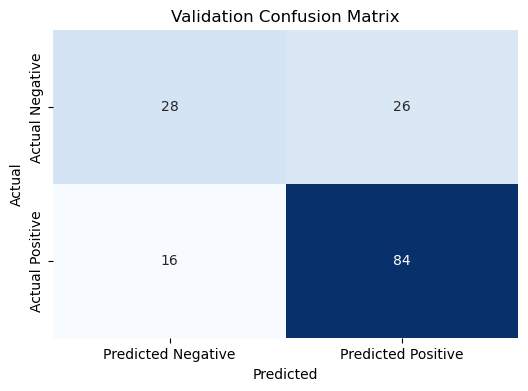

Model 2 Results
Val Accuracy: 0.7272727272727273
Precision: 0.7636
Recall: 0.8400
False Negative Rate (FNR): 0.1600


In [8]:
# Initialize the Perceptron model
perceptron2 = Perceptron(max_iter=1000, eta0=1, random_state=42, class_weight = None)

# Train the model using training data
perceptron2.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron2.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 2 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

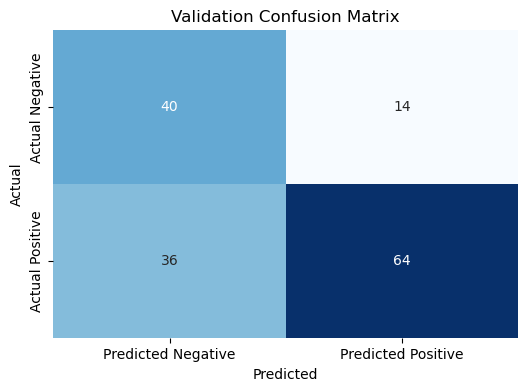

Model 3 Results
Val Accuracy: 0.6753246753246753
Precision: 0.8205
Recall: 0.6400
False Negative Rate (FNR): 0.3600


In [9]:
# Initialize the Perceptron model
perceptron3 = Perceptron(max_iter=1000, eta0=1, random_state=36, class_weight = None)


# Train the model using training data
perceptron3.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron3.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 3 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

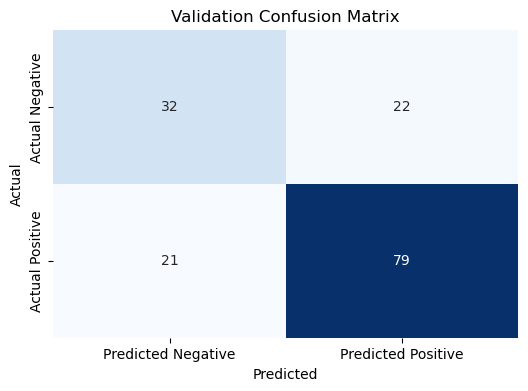

Model 4 Results
Val Accuracy: 0.7207792207792207
Precision: 0.7822
Recall: 0.7900
False Negative Rate (FNR): 0.2100


In [10]:
# Initialize the Perceptron model
perceptron4 = Perceptron(max_iter=1000, eta0=1, random_state=24, class_weight = None)

# Train the model using training data
perceptron4.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron4.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 4 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

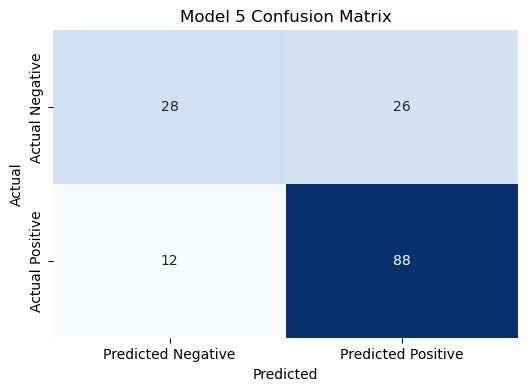

Model 5 Results
Val Accuracy: 0.7532467532467533
Precision: 0.7719
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [11]:
# Initialize the Perceptron model
perceptron5 = Perceptron(max_iter=1000, eta0=1, random_state=12, class_weight = None)

# Train the model using training data
perceptron5.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron5.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model 5 Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 5 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

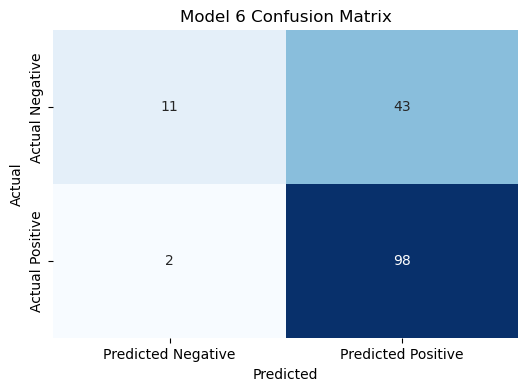

Model 6 Results
Val Accuracy: 0.7077922077922078
Precision: 0.6950
Recall: 0.9800
False Negative Rate (FNR): 0.0200


In [12]:
# Initialize the Perceptron model
perceptron6 = Perceptron(max_iter=1000, eta0=1, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron6.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron6.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model 6 Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 6 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

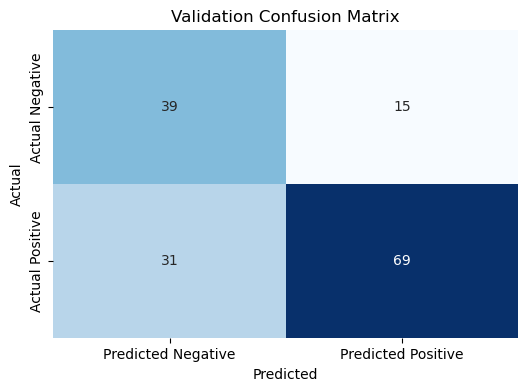

Model 7 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [13]:
# Initialize the Perceptron model
perceptron7 = Perceptron(max_iter=1000, eta0=0.1, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron7.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron7.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 7 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

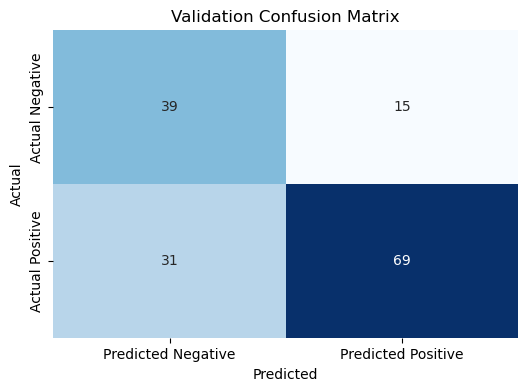

Model 8 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [14]:
# Initialize the Perceptron model
perceptron8 = Perceptron(max_iter=1000, eta0=0.01, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron8.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron8.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 8 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

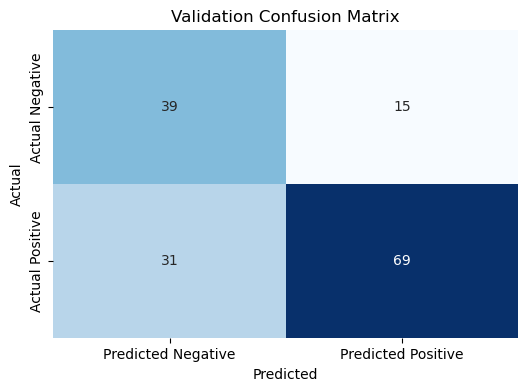

Model 9 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [15]:
# Initialize the Perceptron model
perceptron9 = Perceptron(max_iter=1000, eta0=0.001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron9.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron9.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 9 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

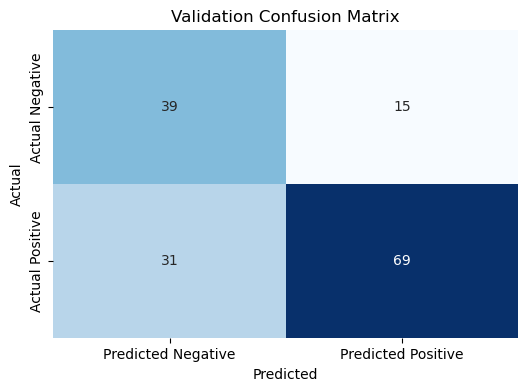

Model 10 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [16]:
# Initialize the Perceptron model
perceptron10 = Perceptron(max_iter=1000, eta0=0.0001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron10.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron10.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1]) 

# Print precision, recall, and false negative rate
print(f"Model 10 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

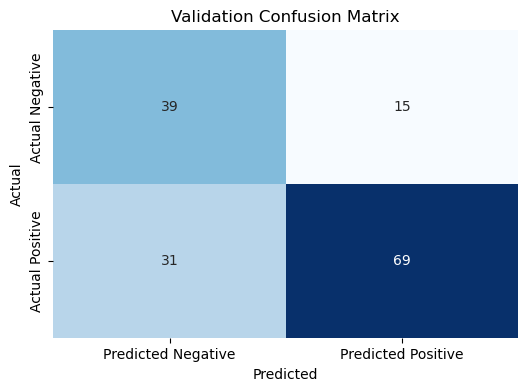

Model 11 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [17]:
# Initialize the Perceptron model
perceptron11 = Perceptron(max_iter=500, eta0=0.001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron11.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron11.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 11 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

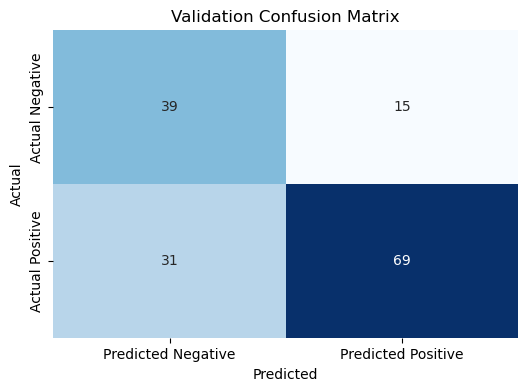

Model 12 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [18]:
# Initialize the Perceptron model
perceptron12 = Perceptron(max_iter=250, eta0=0.001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron12.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron12.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 12 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

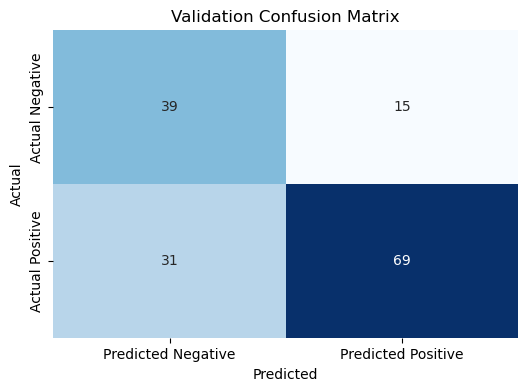

Model 13 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [19]:
# Initialize the Perceptron model
perceptron13 = Perceptron(max_iter=100, eta0=0.001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron13.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron13.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 13 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

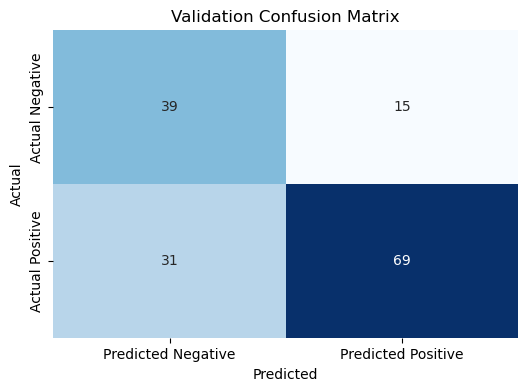

Model 14 Results
Val Accuracy: 0.7012987012987013
Precision: 0.8214
Recall: 0.6900
False Negative Rate (FNR): 0.3100


In [20]:
# Initialize the Perceptron model
perceptron14 = Perceptron(max_iter=1000, eta0=0.001, random_state=12, class_weight = 'balanced')

# Train the model using training data
perceptron14.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = perceptron14.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Model 14 Results")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

/Users/jocelynnspinelli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


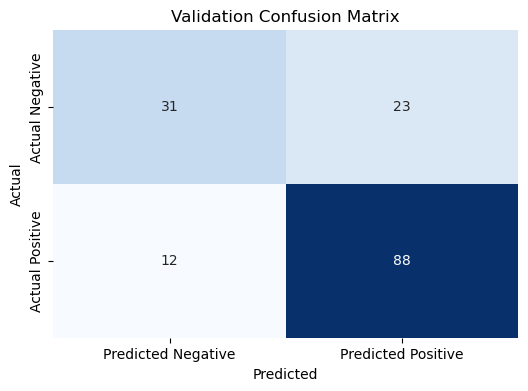

Baseline MLP model
Val Accuracy: 0.7727272727272727
Precision: 0.7928
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp = MLPClassifier()

# Train the model using training data
mlp.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"Baseline MLP model")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

/Users/jocelynnspinelli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


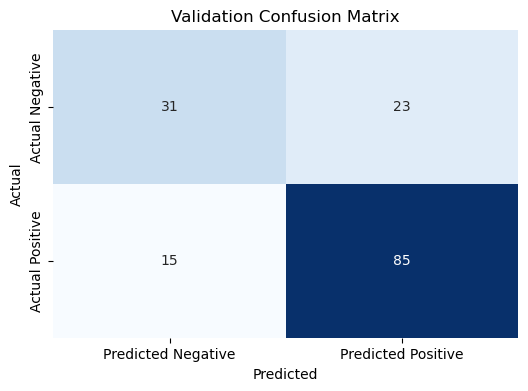

MLP Model 2
Val Accuracy: 0.7532467532467533
Precision: 0.7870
Recall: 0.8500
False Negative Rate (FNR): 0.1500


In [22]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp2 = MLPClassifier(max_iter=1000, activation='relu', random_state=12, alpha=0.0001)

# Train the model using training data
mlp2.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp2.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 2")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

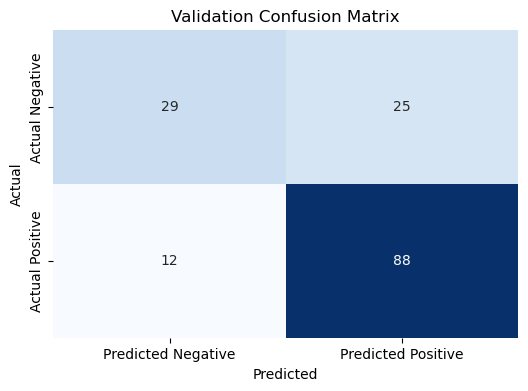

MLP Model 3
Val Accuracy: 0.7597402597402597
Precision: 0.7788
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [23]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp3 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.0001)

# Train the model using training data
mlp3.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp3.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 3")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

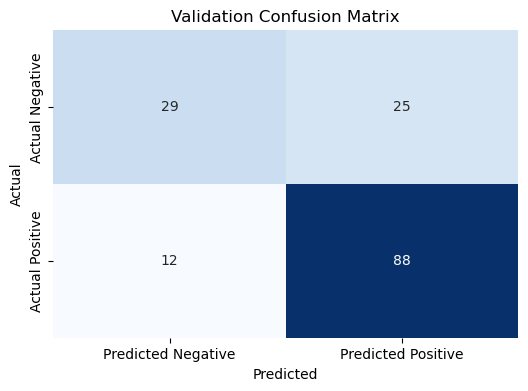

MLP Model 4
Val Accuracy: 0.7597402597402597
Precision: 0.7788
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [24]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp4 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.001)

# Train the model using training data
mlp4.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp4.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 4")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

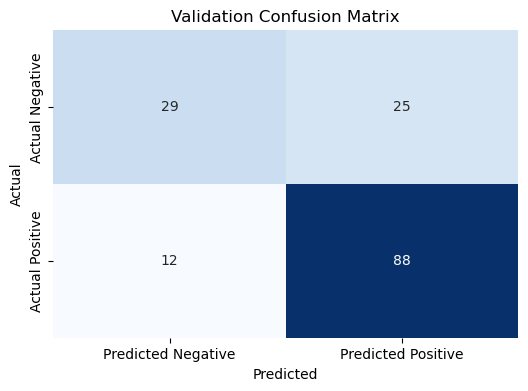

MLP Model 5
Val Accuracy: 0.7597402597402597
Precision: 0.7788
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [25]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp5 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.01)

# Train the model using training data
mlp5.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp5.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 5")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

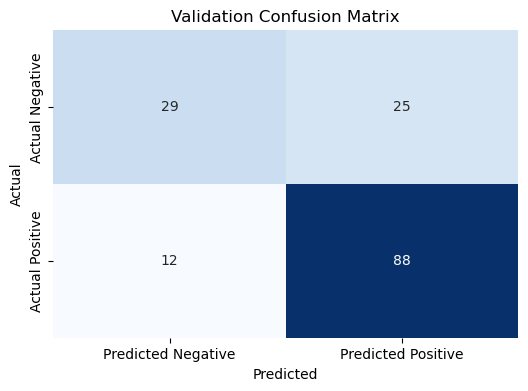

MLP Model 6
Val Accuracy: 0.7597402597402597
Precision: 0.7788
Recall: 0.8800
False Negative Rate (FNR): 0.1200


In [26]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp6 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.1)

# Train the model using training data
mlp6.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp6.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 6")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

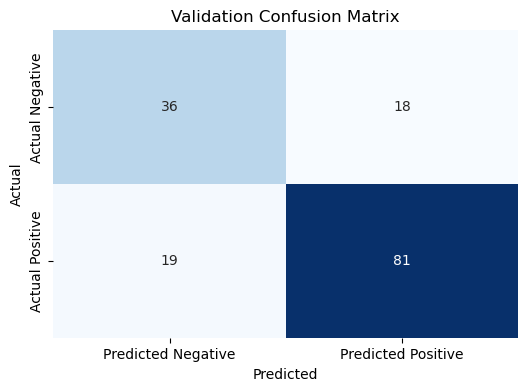

MLP Model 7
Val Accuracy: 0.7597402597402597
Precision: 0.8182
Recall: 0.8100
False Negative Rate (FNR): 0.1900


In [27]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp7 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.1, learning_rate_init=0.1)

# Train the model using training data
mlp7.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp7.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 7")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

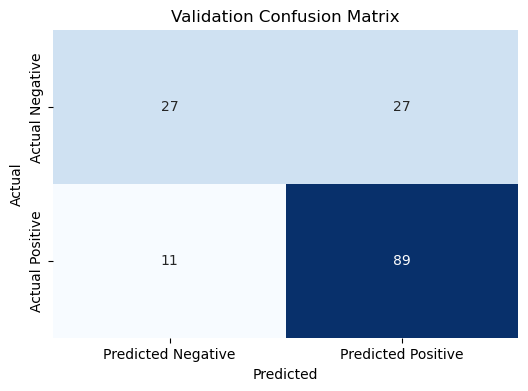

MLP Model 8
Val Accuracy: 0.7532467532467533
Precision: 0.7672
Recall: 0.8900
False Negative Rate (FNR): 0.1100


In [28]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp8 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.1, learning_rate_init=0.01)

# Train the model using training data
mlp8.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp8.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 8")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

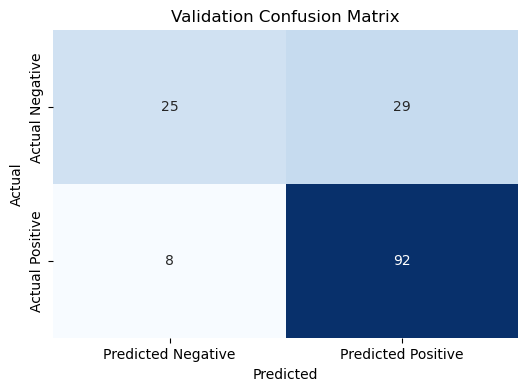

MLP Model 9
Val Accuracy: 0.7597402597402597
Precision: 0.7603
Recall: 0.9200
False Negative Rate (FNR): 0.0800


In [29]:
# Initialize the MLP model with a custom activation function (e.g., 'relu')
mlp9 = MLPClassifier(max_iter=1000, activation='tanh', random_state=12, alpha=0.1, learning_rate_init=0.0001)

# Train the model using training data
mlp9.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp9.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 9")
print(f"Val Accuracy: {val_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

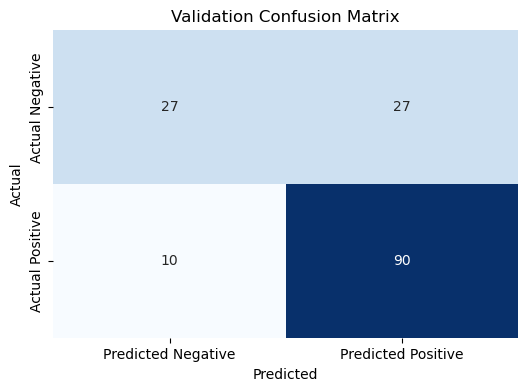

MLP Model 10
Validation Accuracy: 0.7597
Precision: 0.7692
Recall: 0.9000
False Negative Rate (FNR): 0.1000


In [30]:
# Initialize the MLP model with custom hidden layers and activation function
mlp10 = MLPClassifier(hidden_layer_sizes=(64, 32),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp10.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp10.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 10")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


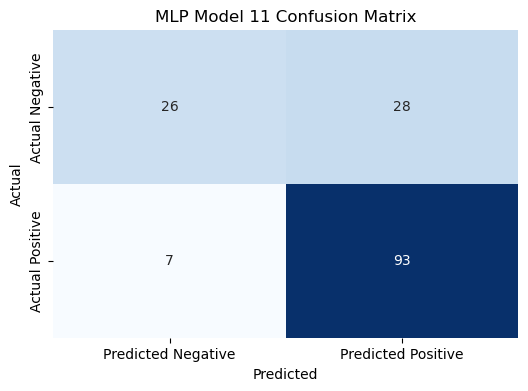

MLP Model 11
Validation Accuracy: 0.7727
Precision: 0.7686
Recall: 0.9300
False Negative Rate (FNR): 0.0700


In [31]:
# Initialize the MLP model with custom hidden layers and activation function
mlp11 = MLPClassifier(hidden_layer_sizes=(32, 16),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp11.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp11.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Model 11 Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 11")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


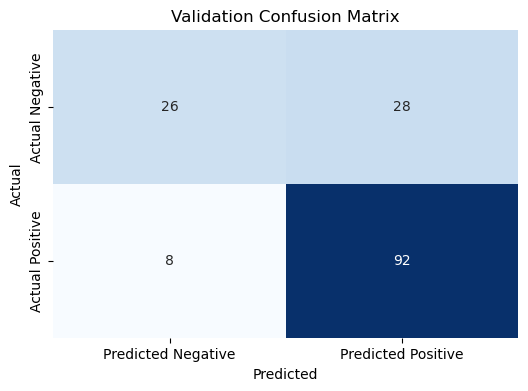

MLP Model 12
Validation Accuracy: 0.7662
Precision: 0.7667
Recall: 0.9200
False Negative Rate (FNR): 0.0800


In [32]:
# Initialize the MLP model with custom hidden layers and activation function
mlp12 = MLPClassifier(hidden_layer_sizes=(16, 16),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp12.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp12.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 12")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


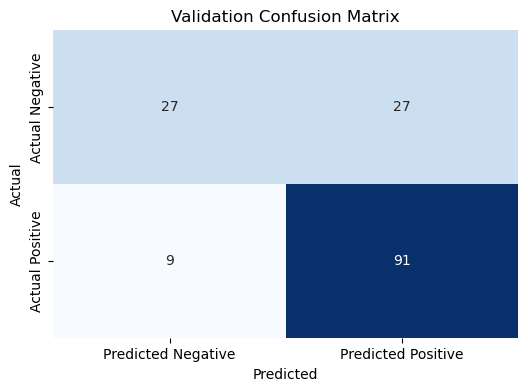

MLP Model 13
Validation Accuracy: 0.7662
Precision: 0.7712
Recall: 0.9100
False Negative Rate (FNR): 0.0900


In [33]:
# Initialize the MLP model with custom hidden layers and activation function
mlp13 = MLPClassifier(hidden_layer_sizes=(16, 8),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp13.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp13.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 13")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


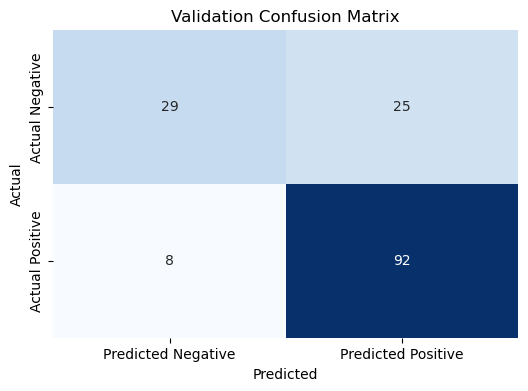

MLP Model 14
Validation Accuracy: 0.7857
Precision: 0.7863
Recall: 0.9200
False Negative Rate (FNR): 0.0800


In [34]:
# Initialize the MLP model with custom hidden layers and activation function
mlp14 = MLPClassifier(hidden_layer_sizes=(8, 8),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp14.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp14.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1]) 

# Print precision, recall, and false negative rate
print(f"MLP Model 14")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

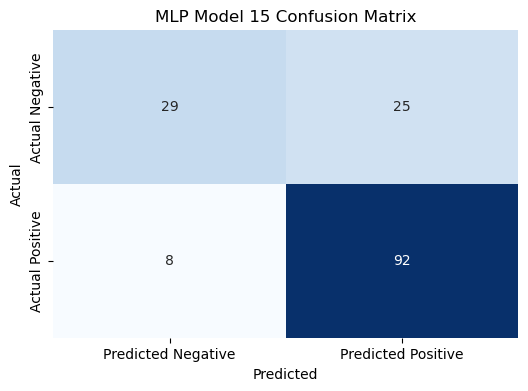

MLP Model 15
Validation Accuracy: 0.7857
Precision: 0.7863
Recall: 0.9200
False Negative Rate (FNR): 0.0800


In [35]:
# Initialize the MLP model with custom hidden layers and activation function
mlp15 = MLPClassifier(hidden_layer_sizes=(32,16, 8),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp15.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp15.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Model 15 Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 15")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

/Users/jocelynnspinelli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


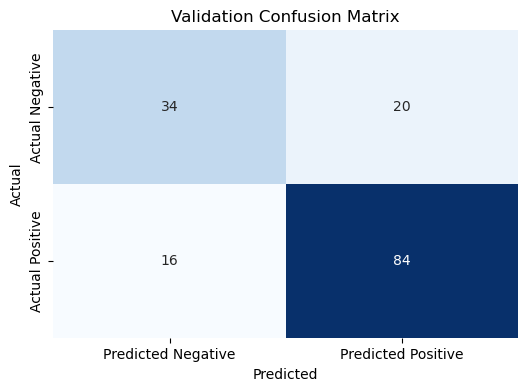

MLP Model 16
Validation Accuracy: 0.7662
Precision: 0.8077
Recall: 0.8400
False Negative Rate (FNR): 0.1600


In [36]:
# Initialize the MLP model with custom hidden layers and activation function
mlp16 = MLPClassifier(hidden_layer_sizes=(32,16, 8),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.001)

# Train the model using training data
mlp16.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp16.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 16")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

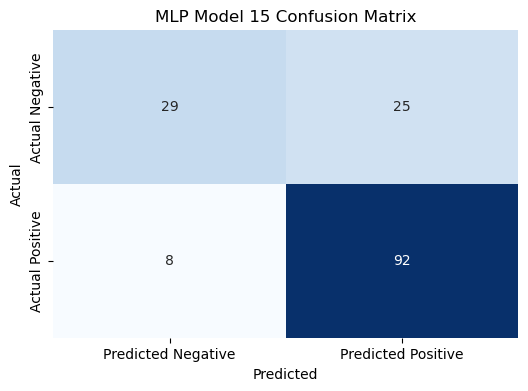

MLP Model 15
Validation Accuracy: 0.7857
Precision: 0.7863
Recall: 0.9200
False Negative Rate (FNR): 0.0800


In [37]:
# Retrain prior to testing Test data
mlp15 = MLPClassifier(hidden_layer_sizes=(32,16, 8),  
                    max_iter=1000, 
                    activation='tanh',  
                    random_state=12, 
                    alpha=0.01,
                    learning_rate_init=0.0001)

# Train the model using training data
mlp15.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp15.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Create the confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a blue grid
plt.figure(figsize=(6,4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Model 15 Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
fnr = val_cm[1, 0] / (val_cm[1, 0] + val_cm[1, 1])  

# Print precision, recall, and false negative rate
print(f"MLP Model 15")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

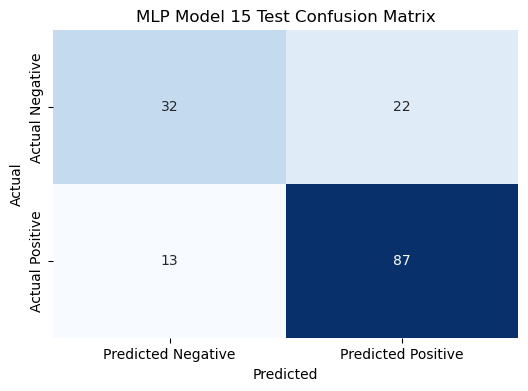

MLP Model 15 - Test Data
Test Accuracy: 0.7727
Test Precision: 0.7982
Test Recall: 0.8700
Test False Negative Rate (FNR): 0.1300


In [38]:
# Make predictions on the test set
y_test_pred = mlp15.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a blue grid for the test set
plt.figure(figsize=(6,4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Model 15 Test Confusion Matrix')
plt.show()

# Calculate precision, recall, and false negative rate (FNR) for the test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_fnr = test_cm[1, 0] / (test_cm[1, 0] + test_cm[1, 1]) 

# Print test results
print(f"MLP Model 15 - Test Data")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test False Negative Rate (FNR): {test_fnr:.4f}")
